In [11]:
import numpy as np
import pandas as pd

In [12]:
pip install pycaret

In [13]:
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression  # Replace with your regression model of choice

from sklearn.preprocessing import LabelBinarizer

from sklearn .model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [14]:
class get_cleaned_data:

    def load_data (self,path):
        extention =path.split('.')[-1]
        if extention == 'csv':
           data = pd. read_csv(path)
        elif extention == 'json' :
           data = json.load(path)
        elif extention == 'txt' :
           with open(path, 'r') as file:
                data = file.read()
        elif extention == 'db':
            conn = sqlite3.connect(path)
            query = "SELECT * FROM ;"
            data = pd.read_sql(query, conn)
            conn.close()
        else:
            raise ValueError("Unsupported file extension")
        return data

    def check(self,data):
        print(data.isnull().sum())
        if data.isnull().sum() .sum() == 0:
            print ('\nNO Null Value')
        else :
            print('\nWarning :Null value ,deal with it')
            for c in data.columns :
                print(c)
                if data[c].dtype !='object' :
                    print(c)
                    if data[c].isna().sum()> data.shape[0]/4:
                        #print(c,'n')
                        data[c].dropna()
                    elif data[c].isna().sum()==0:
                        continue
                    else :
                        #print(c,'else')
                        data[c].fillna(data[c].mean(),inplace=True)
                else :
                    if data[c] .isna().sum()>0:
                        mode_category = data[c].mode()[0]
                        data[c].fillna(value=mode_category, inplace=True)

            print(data.isnull().sum())
        if data.index.is_unique:
            print('\nSample is unique no duplicated')

        else :
            print('\ndupplicated , deal with it ...')
            data_unique = data.drop_duplicates(keep='first')

        return data


In [15]:
#WA_Fn-UseC_-Telco-Customer-Churn.csv
path = input('Enter the path of data please:')


Enter the path of data please:WA_Fn-UseC_-Telco-Customer-Churn.csv


In [16]:
setup_obj =get_cleaned_data()
data=setup_obj.load_data(path)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
import pandas as pd

def preprocess_data(data):
    # Detect column types
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()

    # Iterate through categorical columns
    choice = input(f"What do you want to do with missing values' (1_most_frequent/ 2_additional_class)? ")

    for col in categorical_columns:
        #choice = input(f"What do you want to do with missing values in '{col}' (1_most_frequent/ 2_additional_class)? ")
        if choice == "most_frequent":
            data[col].fillna(data[col].mode()[0], inplace=True)
        elif choice == "additional_class":
            data[col].fillna("missing", inplace=True)
        # Add more handling options as needed

        # Iterate through numeric columns
    choice = input(f"What do you want to do with missing values (1-mean/2-median/3-mode)? ")

    for col in numeric_columns:
        #choice = input(f"What do you want to do with missing values in '{col}' (mean/median/mode/leave_blank)? ")
        if choice == "1":
            data[col].fillna(data[col].mean(), inplace=True)
        elif choice == '2':
            data[col].fillna(data[col].median(), inplace=True)
        elif choice == "3":
            data[col].fillna(data[col].mode()[0], inplace=True)
        # Add more handling options as needed

    return data

# Load your dataset
#data= pd.read_csv(path)
# Call the preprocessing function
preprocessed_data = preprocess_data(data)

# Continue with the rest of your data preprocessing and modeling steps


What do you want to do with missing values' (1_most_frequent/ 2_additional_class)? 1
What do you want to do with missing values (1-mean/2-median/3-mode)? 1


In [18]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
import seaborn as sns

def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data)
cat_feature
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data)
num_feature


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
def EDA (df):
    def corr(data):
        numeric_columns = data.select_dtypes(exclude=['object']).columns
        corr_matrix= data[numeric_columns].corr()


        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()

    def box(data,cat_feature,target):
      if target.dtype  !='object':
        fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        for i, f in enumerate(cat_feature):
            row = i // 3  # Row index of the subplot
            col = i % 3  # Column index of the subplot
            sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])
        for i in range(len(cat_feature), len(axes.ravel())):
            fig.delaxes(axes.ravel()[i])

        plt.tight_layout()  # Adjust subplot spacing
        plt.show()

    #box(data,cat_feature,data.iloc[:,-1])


    def scatter(df,num_feature):
        #_,ax = plt.subplots(3,3,figsize=(12,4))
        #fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        #for i, f in enumerate(num_feature):
            #row = i // 3  # Row index of the subplot
            #col = i % 3  # Column index of the subplot

        #df.plot.scatter(x=num_feature[i-1],y=num_feature[i])
        #data.scatter(x=
        sns.pairplot(data)
        plt.tight_layout()
        plt.show()


    corr(df)
    print('box plot:')
    box(df,cat_feature,data.iloc[:,-1])
    print('scatter plot')
    scatter(df,num_feature)



In [22]:

target = input('Inter the name of the target columns:')# like "Churn" or "Price"

Inter the name of the target columns:Churn


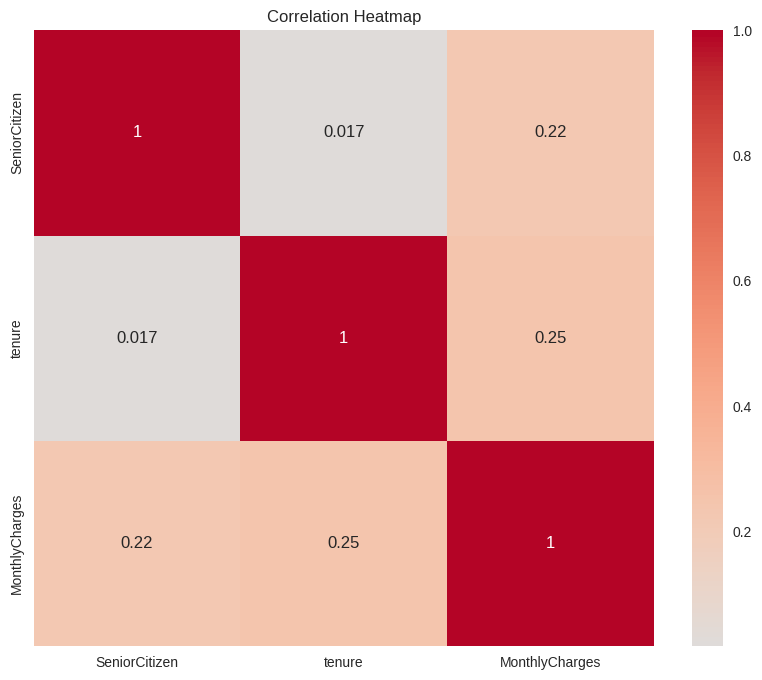

box plot:
scatter plot


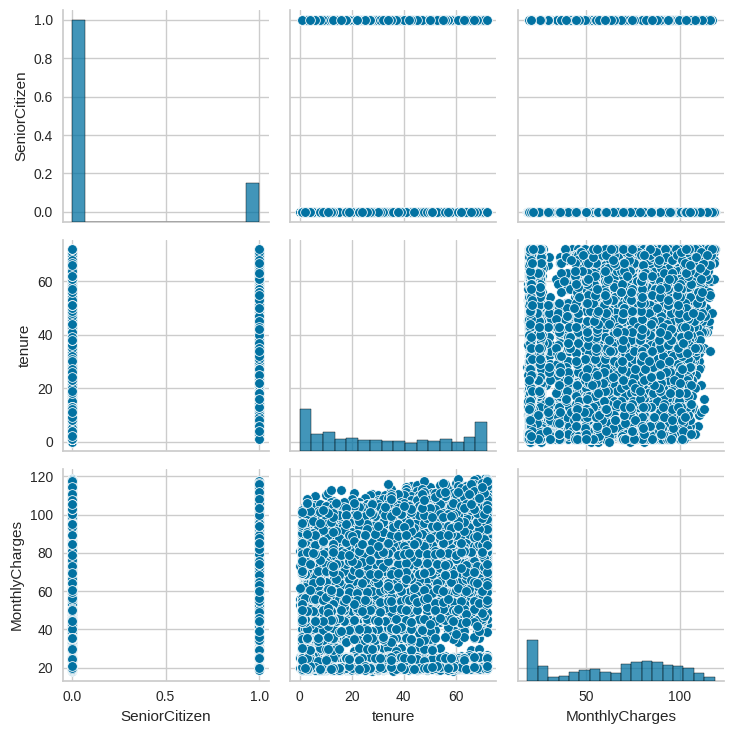

In [23]:
EDA(data,)

In [24]:
def set_up(df,target):

        def basic_inf (df,target):
            dic= {'Target':[target],'shape':[df.shape],
          'target type':[df[target].dtype],
          'N.catigorical feature':[(df.dtypes=='object').sum()],
          'N.numerical feature':[((df.dtypes == 'float64') | (df.dtypes == 'int64')).sum()],
          'Task':['classification' if df[target].dtype == 'object' else 'regression']
         }
            #df = pd.DataFrame(dic)
            global task_type
            task_type = ['classification' if df[target].dtype == 'object' else 'regression']
            df = pd.DataFrame(dic)
            return df.T

        def uniq (df):
            df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
            return df

        def binarizer (df,bin_val):
            lb = LabelBinarizer()

            for col in bin_val :
                df[col]=lb .fit_transform(df[col])

            return df

        def numeric(df,num_val):
            for col in num_val:
                #print(col)
                df [col]=pd.to_numeric(df[col],errors='coerce')
            return df

        def dummy(df):
            df_dummy=pd.get_dummies(df)
            return df_dummy

        def split(df_dummy,target):
            y,X = df_dummy[target],df_dummy.drop(columns=target)
            global x_train ,x_test,y_train,y_test
            x_train ,x_test,y_train,y_test =  train_test_split (X,y,test_size=.3,random_state=22)
            print(x_train.shape ,x_test.shape,'\n',y_train.shape,y_test.shape)
            return x_train ,x_test,y_train,y_test

        def normalizer (df):

            from sklearn.preprocessing import MinMaxScaler

            mms = MinMaxScaler()

            for col in [num_feature]:
                 df[col] = mms.fit_transform(df[col])
            return df

        basic_info = basic_inf(df,target)
        df_unique = uniq(df)
        cat_val = list(df_unique[(df_unique['len']>2) & (df_unique['types']=='object')].index)
        bin_val = list(df_unique[df_unique['len']==2].index)
        num_val= list(set(df.columns) -set(cat_val))

        df = binarizer(df,bin_val)
        df = numeric(df,num_val)

        #data = binarizer(data,cat_val)
        if df[target].dtype == 'object':
            label_encoder = LabelEncoder()
            df[target] = label_encoder.fit_transform(df[target])


        df = dummy(df)

        #lb = LabelBinarizer()
        #data =lb.fit_transform(data)
        df= binarizer(df,list(set(df.columns)-set(num_val)-set(bin_val)))
        df = normalizer(df)
        split(df,target)

        global data
        data = df
        #return data
        return basic_info

        #return df_unique



In [25]:
#data=
set_up(data,target)

(4930, 13613) (2113, 13613) 
 (4930,) (2113,)


,0
Target,Churn
shape,"(7043, 21)"
target type,object
N.catigorical feature,18
N.numerical feature,3
Task,classification


In [26]:
data#['SalePrice'].dtype=='ob'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,customerID_0002-ORFBO,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0.0,1,0,0.013889,0,1,0.115423,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,0,0.472222,1,0,0.385075,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0,0,0.027778,1,1,0.354229,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0,0,0.625000,0,0,0.239303,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0.027778,1,1,0.521891,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,0.333333,1,1,0.662189,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,0.0,1,1,1.000000,1,1,0.845274,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,0.0,1,1,0.152778,0,1,0.112935,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1.0,1,0,0.055556,1,1,0.558706,1,0,...,0,0,0,0,0,0,0,0,0,0


**model**

In [27]:

class RegModel:
    def __init__(self, model,model_name):
        self.model = model
        self.model_name = model_name
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
        mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
        r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)
        result={'Model':self.model_name,
                'MSE':mse,
                'MAE':mae,
                'r2' :r2
                }
        return result



In [28]:
def plot_model(df_results):
    for i in range(len(df_results.T)):
        #print(df_results.columns[0])
        plt.plot(df_results[df_results.columns[i]],marker='o')
        plt.legend([c for c in df_results.columns],title='Metrics')

        plt.show

In [29]:

class clasModel:
    def __init__(self, model,model_name='m'):
        self.model = model
        self.model_name = model_name

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def prob(self ,X_test):
        y_prob = self.model.predict_proba(X_test)[:, 1]

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        #y_prob = self.prob(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        #auc = roc_auc_score(y_test, y_prob)
        #metrics = [accuracy,precision,recall,f1,auc]
        result = {
        'Model': self.model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        #'AUC': auc
         }
        return result

In [30]:
def compare_model():
    if task_type[0] =='classification':
        global clasmodels
        clasmodels = {'KNN':KNeighborsClassifier(),
                 'Logistic Regression': LogisticRegression(),
                 'Random Forest': RandomForestClassifier(),
                 'Decision Tree': DecisionTreeClassifier(),
                 #'SVM': SVC()
                  }

        results= []
        for  nm,model in zip(clasmodels,clasmodels.values()):
            modeli = clasModel(model,nm)
            modeli.train(x_train,y_train)
            result = modeli.evaluate(x_test,y_test)
            results.append(result)
            print (nm)
        #df_results = pd.DataFrame(results)

    elif task_type[0] =='regression':
        global regmodels
        regmodels = {'KNNReg':KNeighborsRegressor(n_neighbors=5),
                 'Linear Regression': LinearRegression(),
                 'Ridge': Ridge(alpha=1.0),

                  }

        results= []
        for  nm,model in zip(regmodels.keys(),regmodels.values()):
            modeli = RegModel(model,nm)
            modeli.train(x_train,y_train)
            result = modeli.evaluate(x_test,y_test)
            results.append(result)
            print (nm)

    df_results = pd.DataFrame(results)

    df_results=df_results.set_index('Model')

    #df_results=df_results.sort_values(by=df_results.iloc[:,0],ascending=False)

    df_results=df_results.sort_values(by=df_results.columns[0]
                                      ,ascending=False)

    global best_model
    best_model=df_results[df_results[df_results.columns[0]]==df_results[df_results.columns[0]][0]].index
    best_model=best_model[0]
    print('best model based on Accureacy score:',best_model)

    for i in range(len(df_results.T)):
        #print(df_results.columns[0])
        plt.plot(df_results[df_results.columns[i]],marker='o')
        plt.legend([c for c in df_results.columns],title='Metrics')

        plt.show
    return df_results

KNN
Logistic Regression
Random Forest
Decision Tree
best model based on Accureacy score: Logistic Regression


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.793185,0.651357,0.536082,0.588124
Random Forest,0.778514,0.651596,0.420962,0.511482
Decision Tree,0.767156,0.603687,0.450172,0.515748
KNN,0.759584,0.570076,0.517182,0.542342


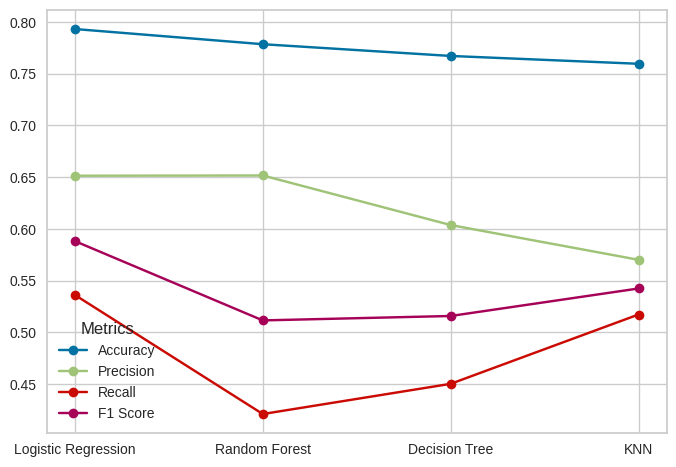

In [31]:
compare_model()

In [32]:
best_model

'Logistic Regression'

In [33]:
'''def evaluate(best_model):
    #intial the model
    if task_type[0] =='classification':
        if best_model in clasmodels.keys():
            model = clasmodels[best_model]
            print(model)
    elif task_type[0]!='classification':
        if best_model in regmodels.keys():
            model = regmodels[best_model]
            print(model)

    #evaluate best model in out test data

    y_pred=model.predict(x_test)




#clasmodels.keys()
evaluate(best_model)'''

"def evaluate(best_model):\n    #intial the model\n    if task_type[0] =='classification':\n        if best_model in clasmodels.keys():\n            model = clasmodels[best_model]\n            print(model)\n    elif task_type[0]!='classification':\n        if best_model in regmodels.keys():\n            model = regmodels[best_model]\n            print(model)\n            \n    #evaluate best model in out test data\n    \n    y_pred=model.predict(x_test)\n    \n    \n\n                \n#clasmodels.keys()\nevaluate(best_model)"

Explore pycaret libirary

In [34]:
from pycaret.classification import *

#data = get_cleand_data("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = pd.read_csv(path)
setup(data, target=target)

,Description,Value
0,Session id,807
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ordinal features,5
9,Numeric features,3


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7726,0.7676,0.7726,0.7643,0.7671,0.3910,0.3932,0.4730
lr,Logistic Regression,0.7452,0.8314,0.7452,0.7346,0.6561,0.0772,0.1564,1.8920
ridge,Ridge Classifier,0.7422,0.0000,0.7422,0.7142,0.6558,0.0742,0.1397,0.6460
et,Extra Trees Classifier,0.7359,0.6616,0.7359,0.6291,0.6262,0.0088,0.0353,0.9970
nb,Naive Bayes,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.6810
dt,Decision Tree Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.5570
rf,Random Forest Classifier,0.7347,0.7445,0.7347,0.5398,0.6223,0.0000,0.0000,0.8950
qda,Quadratic Discriminant Analysis,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.4290
ada,Ada Boost Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.7710
gbc,Gradient Boosting Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.7330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
predictions = predict_model(best_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8197,0.8715,0.8197,0.8136,0.8155,0.5174,0.5196


**Thank you (programmer Ahmed Alaa)**
